## Naive LR on all selected variables
- Used all selected var from VAR MAP
- Filled NA with mean

In [2]:
import sys, os
DMOL_DIR = "/Users/Henryye/research/shaf/DMOL"
sys.path.append(os.path.join(DMOL_DIR, "utils"))

from ml_utils import *


import numpy as np
import pandas as pd
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("../data/class_data.csv")
df_proc = preprocess_df(df, verbose = False)

In [9]:
def get_metrics(y_true, y_pred):
    print("MSE:  {}".format(mean_squared_error(y_true, y_pred)))
    print("MAE:  {}".format(mean_absolute_error(y_true, y_pred)))
    print("r-squared:  {}".format(r2_score(y_true, y_pred)))
    
def plot_results(y_true, y_pred):
    plt.figure(figsize = (8, 3))
    plt.scatter(y_true, y_pred)
    plt.plot(np.linspace(min(y_true), max(y_true)), np.linspace(min(y_true), max(y_true)), '-r')
    plt.xlabel("y true", fontsize = 12)
    plt.ylabel("y pred", fontsize = 12)
    plt.show()

def train_model(df, week_num, use_fr = False, plot = False):
    target = "gr_revq{}".format(week_num)
    var_map_curr = NEW_VAR_MAP["week_{}".format(week_num)]
    var_to_use = [var for var_list in var_map_curr["Quant"].values() for var in var_list] + \
                 ["gr_revq{}".format(i) for i in range(max(1, week_num-1), week_num)]
    if use_fr:
        fr_vars = [var for var_list in var_map_curr["FR"].values() for var in var_list]
        for var in fr_vars:
            if df[var].dtypes != np.dtype('object'):
                var_to_use.append(var)
    
    df_model = df[var_to_use + [target]].copy()
    df_model = df_model.fillna(df_model.mean())
    X, y = df_model[var_to_use].copy(), df_model[target]
    print(X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#     reg = LinearRegression().fit(X_train, y_train)
    reg = Lasso(alpha = 0.5).fit(X_train, y_train)
    print("Training Score:  ")
    y_train_pred = reg.predict(X_train)
    get_metrics(y_train, y_train_pred)
    print('\n')
    print("Testing Score:   ")
    y_test_pred = reg.predict(X_test)
    get_metrics(y_test, y_test_pred) 
    
    if plot:
        print("Training plots:  ")
        plot_results(y_train, y_train_pred)
        print("Testing plots：  ")
        plot_results(y_test, y_test_pred)

Week 1
(99, 78)
Training Score:  
MSE:  15.506425666249056
MAE:  2.835708297893126
r-squared:  0.4903865056184288


Testing Score:   
MSE:  28.909304525448164
MAE:  4.252998409068277
r-squared:  0.062223517137355744
Training plots:  


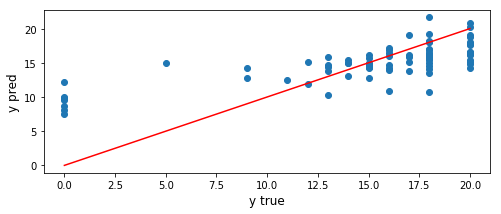

Testing plots：  


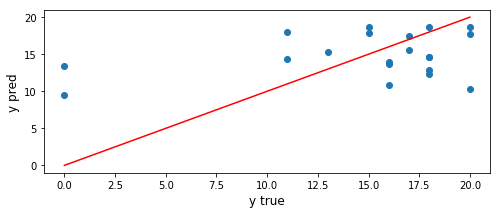




Week 2
(99, 39)
Training Score:  
MSE:  19.53784693705841
MAE:  3.169672046283441
r-squared:  0.413454827916082


Testing Score:   
MSE:  37.04281168994513
MAE:  4.315482001603622
r-squared:  0.12942863243372194
Training plots:  


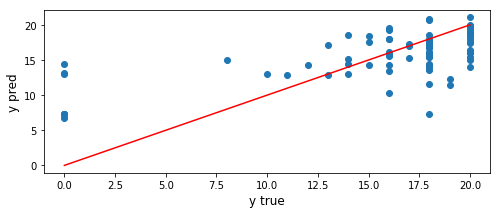

Testing plots：  


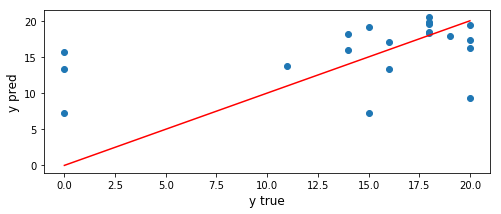




Week 3
(99, 36)
Training Score:  
MSE:  10.787977122512519
MAE:  2.464734960168578
r-squared:  0.6334547466730511


Testing Score:   
MSE:  41.06215390959004
MAE:  4.487151391951037
r-squared:  0.027884613882811493
Training plots:  


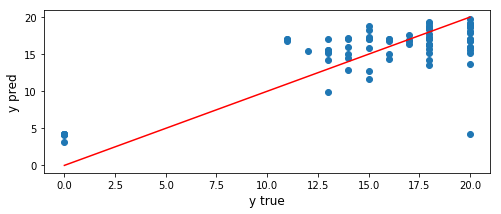

Testing plots：  


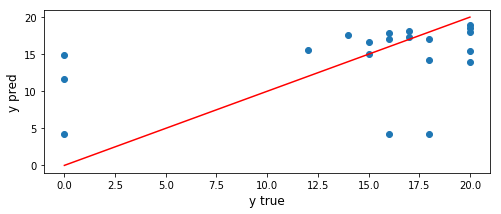




Week 4
(99, 40)
Training Score:  
MSE:  9.264531177405603
MAE:  2.3854217915972007
r-squared:  0.7107614701147134


Testing Score:   
MSE:  32.89587672998723
MAE:  3.78556717159816
r-squared:  0.08336114998294031
Training plots:  


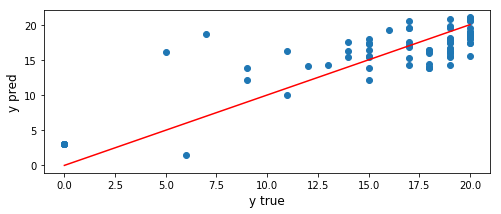

Testing plots：  


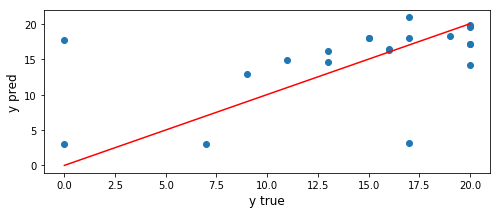




Week 5
(99, 39)
Training Score:  
MSE:  12.819169355719483
MAE:  2.3108732403319645
r-squared:  0.6921390686605509


Testing Score:   
MSE:  28.743452945608404
MAE:  3.5261409351371986
r-squared:  0.4170867380732427
Training plots:  


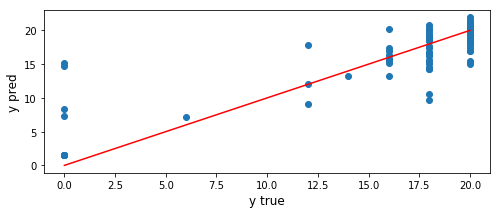

Testing plots：  


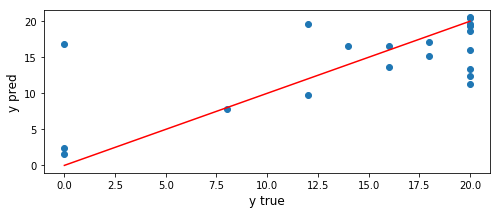

In [10]:
for week_num in range(1, 6):
    print("Week {}".format(week_num))
    train_model(df_proc, week_num, use_fr = False, plot = True)
    print('\n\n')